In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# setting the windows size of the seaborn
sns.set(style='whitegrid',
        color_codes = True)
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 100

In [104]:
train_data_raw = pd.read_csv('main_dataset/train.csv')
test_data_raw  = pd.read_csv('main_dataset/test.csv')

In [105]:
test_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Findings 
# By Looking at this data the Pclass, Survived, Age,  are Skewed 
# but we cannot come to conclusion we need to consider the scale as well  

In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [9]:
# by Looking at this data there are lot of missing values in the column Cabin as a result it has to be droped out
# there are some missing values in the column Age we need to fill them

In [ ]:

train_df['Age'] = train_df.groupby('Pclass')['Fare'].transform(lambda x : x.fillna(x.mean) )

In [106]:
train_data_raw['Sex'] = train_data_raw['Sex'].map({'male':1, 'female':0})
test_data_raw['Sex'] = test_data_raw['Sex'].map({'male':1, 'female':0})
train_data_raw['Embarked'] = train_data_raw['Embarked'].map({'Q':2, 'S':1, 'C':0})
test_data_raw['Embarked'] = test_data_raw['Embarked'].map({'Q':2, 'S':1, 'C':0})

In [120]:
test_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [119]:
train_data_raw['Age'].fillna(train_data_raw['Age'].median(), inplace = True)
test_data_raw['Age'].fillna(test_data_raw['Age'].median(), inplace = True)
train_data_raw['Embarked'] = train_data_raw['Embarked'].replace(np.nan, 0)
test_data_raw['Embarked'] = test_data_raw['Embarked'].replace(np.nan, 0)
train_data_raw['Fare'].fillna(train_data_raw['Fare'].median(), inplace = True)
test_data_raw['Fare'].fillna(test_data_raw['Fare'].median(), inplace = True)
# def fill_nullvalue_by_mean(x):
#     return x.fillna(x.mean)
# train_data_raw['Fare'] = train_data_raw.groupby('Pclass')['Fare'].transform(fill_nullvalue_by_mean(x))
# test_data_raw['Fare'] = test_data_raw.groupby('Pclass')['Fare'].transform(fill_nullvalue_by_mean(x))

In [90]:
for Pclass in list(set(train_data_raw['Pclass'])):
    df_country = train_data_raw[train_data_raw['Pclass']== Pclass]
    df_country['Fare'].fillna(df_country['Fare'].mean(),inplace = True)

for Pclass in list(set(test_data_raw['Pclass'])):
    df_country = test_data_raw[test_data_raw['Pclass']== Pclass]
    df_country['Fare'].fillna(df_country['Fare'].mean(),inplace = True)    

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [91]:
# test_data_raw['Fare'] = test_data_raw['Fare'].astype(float)
test_data_raw['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [121]:
train_data = train_data_raw.copy()
test_data = test_data_raw.copy()

In [122]:
train_data = train_data.drop(["Cabin","Name","Ticket","PassengerId"],axis=1).reset_index(drop = True)
test_data = test_data.drop(["Cabin","Name","Ticket"],axis=1).reset_index(drop = True)

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [125]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [150]:
train_data.duplicated().any()

True

In [98]:
# There are no duplicated data

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,0.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


<AxesSubplot:ylabel='Survived'>

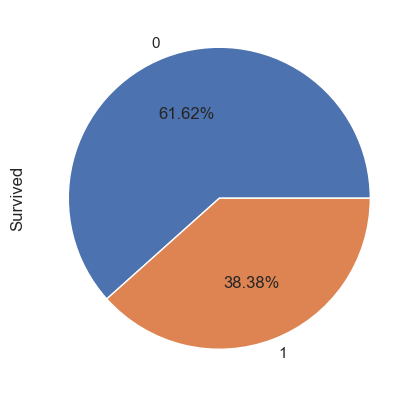

In [35]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [42]:
# In the Data  we have
#  61.2 % of Not Survived 
#  38.38 % of Survived

In [51]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:>

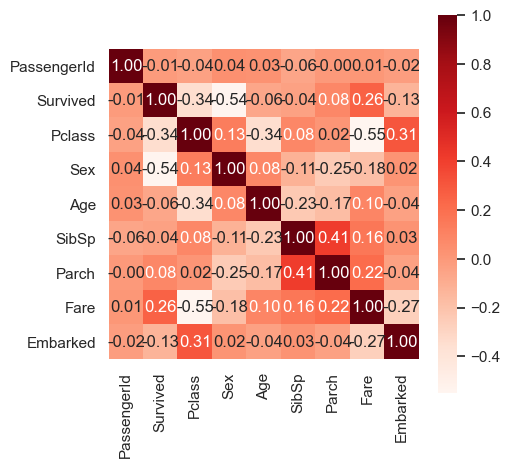

In [36]:
sns.heatmap(train_data.corr(), annot = True, square = True, cmap = 'Reds', cbar = True, fmt = '.2f')

In [56]:
# there are no highly coorilated variables in the indipendent variables

In [69]:
# by Looking at the coorilation with the Target variable we were not able to fine which are the important variables

<AxesSubplot:ylabel='Sex'>

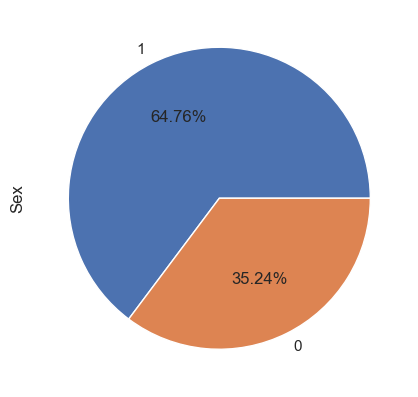

In [38]:
train_data['Sex'].value_counts().plot.pie(autopct = '%1.2f%%')

In [39]:
# 64.76% were male
# 35.24% were femal
train_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

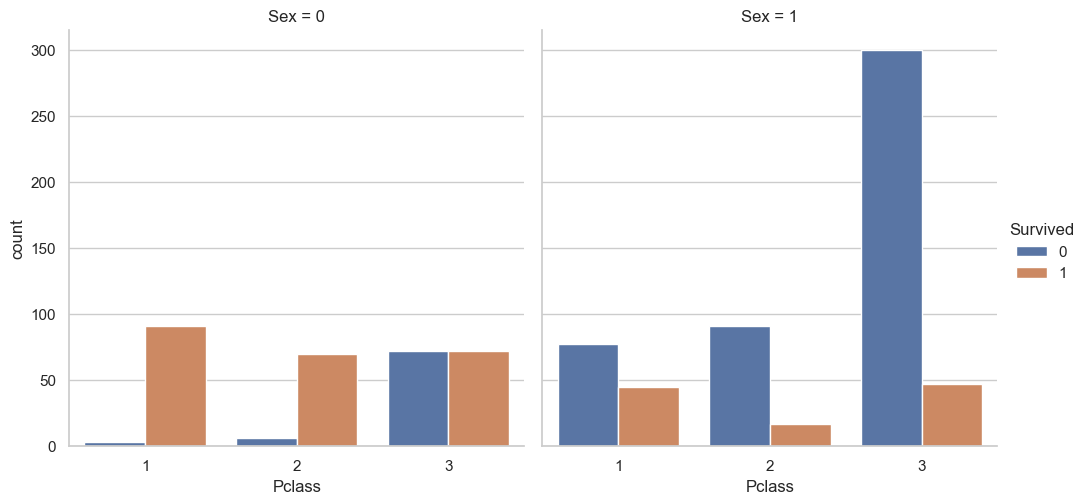

In [40]:
sns.catplot(x = 'Pclass', col = 'Sex', data = train_data, kind = 'count', hue = 'Survived')

In [119]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    object 
 7   Embarked     418 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 26.2+ KB


### Applying ML Model

#### DecisionTree

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [126]:
x = train_data.drop(['Survived'],axis =1).values
y = train_data['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [48]:
model_dt = DecisionTreeClassifier(random_state=303)
np.random.seed(303)
# start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf':[100,200,70, 30],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30}


In [45]:
model_dt = DecisionTreeClassifier(random_state=303,
                                  max_depth=3, 
                                  criterion = 'gini', 
                                  min_samples_leaf=30 )
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8117977528089888
Testing score:  0.7877094972067039


In [46]:
y_pred = model_dt.predict(x_test)
# Model Accuracy
print (model_dt.score(x_test, y_test))

0.7877094972067039


In [21]:
# model_dt.predict(test_data)
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.895623
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.516354
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [60]:
y_pred = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_dt, tpr_dt)
y_score = accuracy_score(y_test, predictions)


In [63]:
metrix_dt = medel_compare("Decision Tree",model_dt, y_test, y_pred, y_score, roc_auc  )
metrix_dt

,Decision Tree
Accuracy,0.787709
Precision,0.760000
Recall,0.593750
F1 Score,0.666667
ROC AUC,0.847079


In [9]:
from sklearn import metrics
def medel_compare(model_name,model,y_test,y_pred,y_score, roc_auc = None):
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : roc_auc
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model_name] 
    return df_metrics

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model_rf = RandomForestClassifier(random_state=303)

In [154]:
param_dist = {'max_depth': [3,4,5,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}


In [128]:
model_rf.set_params(criterion  = 'entropy',
                    max_features = 'auto', 
                    max_depth    = 7)

RandomForestClassifier(criterion='entropy', max_depth=7, random_state=303)

In [78]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

ValueError: n_estimators=15 must be larger or equal to len(estimators_)=1000 when warm_start==True

In [72]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

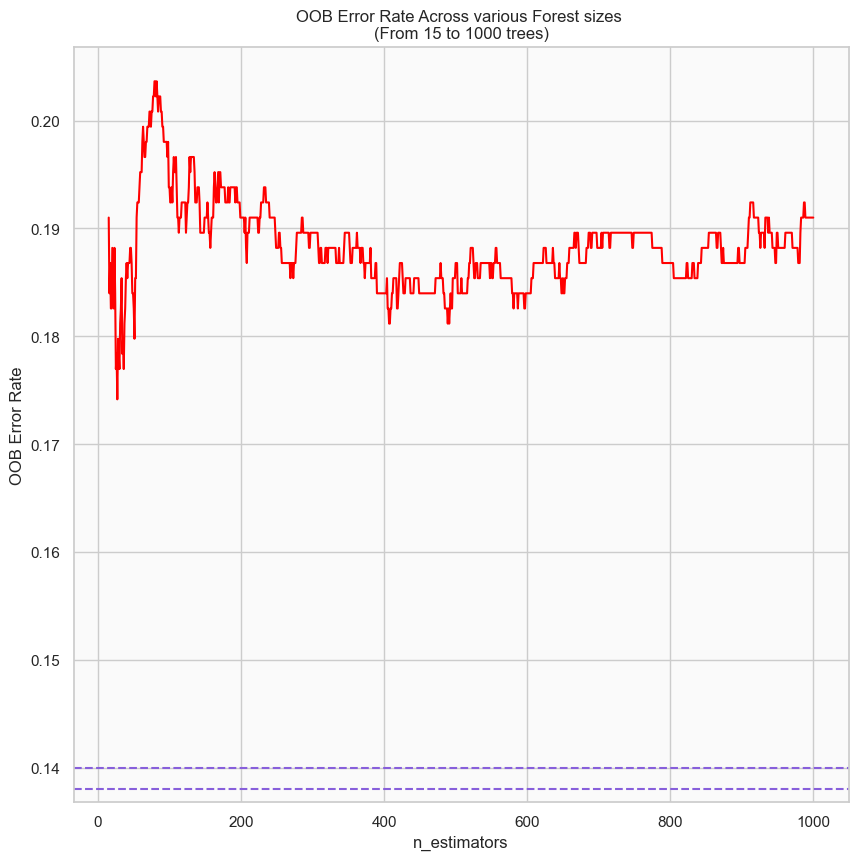

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.14, color='#875FDB',linestyle='--')
plt.axhline(0.138, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [129]:
model_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=303)

In [130]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=303)

In [131]:
prediction_test = model_rf.predict(x_test)
y_score= metrics.accuracy_score(y_test, prediction_test)
y_pred= model_rf.predict(x_test)
#########################################################
y_pred = model_rf.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_dt, tpr_dt)
#########################################################
metrix_rf = medel_compare("Random Forest",model_rf, y_test, prediction_test, y_score , roc_auc_rf )
metrix_rf

,Random Forest
Accuracy,0.804469
Precision,0.730159
Recall,0.718750
F1 Score,0.724409
ROC AUC,0.848641


In [31]:
# test_y = test_data[test_data.columns]
# test_y
model_rf.fit(x, y)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=303)

In [117]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [102]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [132]:
test_data1 = test_data.drop("PassengerId", axis=1).copy()
# test_data1 = test_data1.to_numpy()
# type(test_data1)
prediction_test1 = model_rf.predict(test_data1)
# bodel_rf_best =model_rf.best_estimator_
prediction_test1
# type(test_data1)
# test_data1
# type(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [133]:
test_data['Survived'] = prediction_test1
submission = pd.DataFrame(test_data['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")

In [140]:
submission = pd.DataFrame(test_data['PassengerId'])
submission['Survived'] = test_data['Survived']
submission.to_csv("Submission.csv")

In [141]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### SVM

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [93]:
from sklearn.svm import SVC

In [95]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
model_svc= SVC()
model_svm = GridSearchCV(model_svc, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

0.7317097026604069
{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [109]:
model_svc = SVC(kernel='poly',gamma=0.05, degree=3, C=0.9 )
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = model_svm.predict(x_test)
y_score = metrics.accuracy_score(y_test, preds)
#########################################################
# y_pred = model_svm.predict_proba(x_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_svm = auc(fpr_dt, tpr_dt)
#########################################################
metrix_svm = medel_compare("SVM poly", model_svm, y_test, preds, y_score, roc_auc_svm )
metrix_svm

Accuracy Score:
0.7486033519553073


,SVM poly
Accuracy,0.748603
Precision,0.851852
Recall,0.359375
F1 Score,0.505495
ROC AUC,0.662296
